# Accuracy Examples showing how to use accuracy function

In [1]:
from immas import basic_functions, segmentation, preprocessing, MammogramImage, classification
import numpy
from immas.io import read_dataset

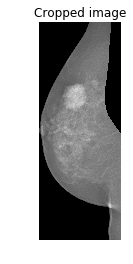

In [2]:
path_image = "../dataset/images/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
path_mask = "../dataset/masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.png"
path_groundtruth="../dataset/groundtruth/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"
pectoral_muscle = "../dataset/pectoral_muscle_masks/22579730_bbd6a3a35438c11b_MG_R_ML_ANON.tif"

mm = MammogramImage(path_image, path_mask, path_groundtruth, pmuscle_mask_path=pectoral_muscle)

basic_functions.show_image_plt(mm.image_data,'Cropped image')

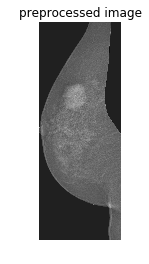

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/segmentation.py:51: RuntimeWarning: invalid value encountered in double_scalars


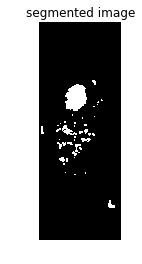

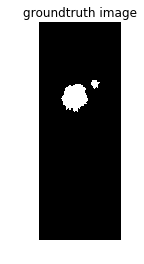

In [3]:
# Perform preprocessing and segmentation, then compare to groundtruth
mm.image_data = preprocessing.fullPreprocessing (mm.image_data)
basic_functions.show_image_plt(mm.image_data, "preprocessed image")
mm.image_data = segmentation.fullSegmentation(mm.image_data)
basic_functions.show_image_plt(mm.image_data, "segmented image")
basic_functions.show_image_plt(mm.cropped_ground_truth, "groundtruth image")

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/basic_functions.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  TP_value = numpy.amax(segmented_images)+numpy.amax(groundtruth_images)


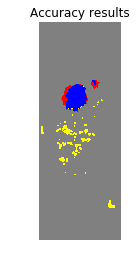

0.9721707757065544

In [9]:
#Calculate accuracy and show visual results
basic_functions.accuracy(mm.image_data, mm.cropped_ground_truth,"yes")

In [5]:
classification.dice_similarity(img, mm.cropped_ground_truth)

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/classification.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


0.6385052802599512

In [11]:
import cv2, numpy
from immas import classification
from immas import basic_functions

def find_match(img, visual_result = "no"):
    _, segmented_contours, _ = cv2.findContours(img.image_data, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    _, groundtruth_contours, _ = cv2.findContours(img.cropped_ground_truth, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_mass_grd = len(groundtruth_contours)

    num_TP = 0
    num_FP = 0
    for i in range(0, len(segmented_contours)):
        segmented_mask = numpy.zeros(img.image_data.shape, dtype='uint8')
        cv2.drawContours(segmented_mask, [segmented_contours[i]], -1, 255, thickness=cv2.FILLED)
        DICE = numpy.zeros(len(groundtruth_contours))
        for j in range(0, len(groundtruth_contours)):
            groundtruth_mask = numpy.zeros(img.image_data.shape, dtype='uint8')
            cv2.drawContours(groundtruth_mask, [groundtruth_contours[j]], -1, 255, thickness=cv2.FILLED)
            DICE[j] = classification.dice_similarity(segmented_mask,groundtruth_mask)
        if numpy.amax(DICE) >= 0.2:
            num_TP = num_TP + 1
        else:
            num_FP = num_FP + 1
    if visual_result == "yes":
        basic_functions.accuracy(img.image_data,img.cropped_ground_truth,"yes")

    return num_TP, num_FP, num_mass_grd

/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/classification.py:18: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/site-packages/immas-1.0-py3.6.egg/immas/basic_functions.py:80: RuntimeWarning: overflow encountered in ubyte_scalars
  TP_value = numpy.amax(segmented_images)+numpy.amax(groundtruth_images)


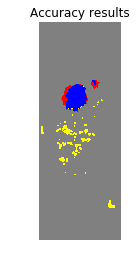

(2, 44, 2)

In [4]:
classification.find_match(mm,"yes")